# Predator-Prey Dynamical System (ODE)

The $\textit{Lotka-Volterra equations}$ describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The equations are defined as:

\begin{equation}
\mathbf{\dot{u}} =
\begin{pmatrix}
\dot{u}_1 \\
\dot{u}_2 
\end{pmatrix}
=
\begin{pmatrix}
\theta_1 u_1 - \theta_{12} u_1 u_2 \\
\theta_{21} u_1 u_2 - \theta_2 u_2
\end{pmatrix}
=:
\mathbf{f(u)}, \ \
\mathbf{u}(0) = \mathbf{u}_0
\end{equation}

where $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ and
- $u_1$ number of **prey**,
- $u_2$ number of **predator**,
- $\theta_1, \theta_2, \theta_{12}, \theta_{21} \geq 0$ **parameters** describing the interaction of the two species.


As a first example we consider rabbits as prey and foxes as predator. In the Lotka-Volterra model $u_1$ and $u_2$ represent the number of rabbits and foxes per square kilometre, respectively. As initial conditions we set $\mathbf{u}_0 = (10, 10)'$. Furthermore, as growth rate of rabbits we fix $\theta_1 = 1.1$ and as death rates $\theta_{12} = 0.4$. For the foxes we fix the growth rate $\theta_{21} = 0.1$ and death rate $\theta_2 = 0.4$. In the following plot we see the population of predator and prey over time $t \in [0,100]$.

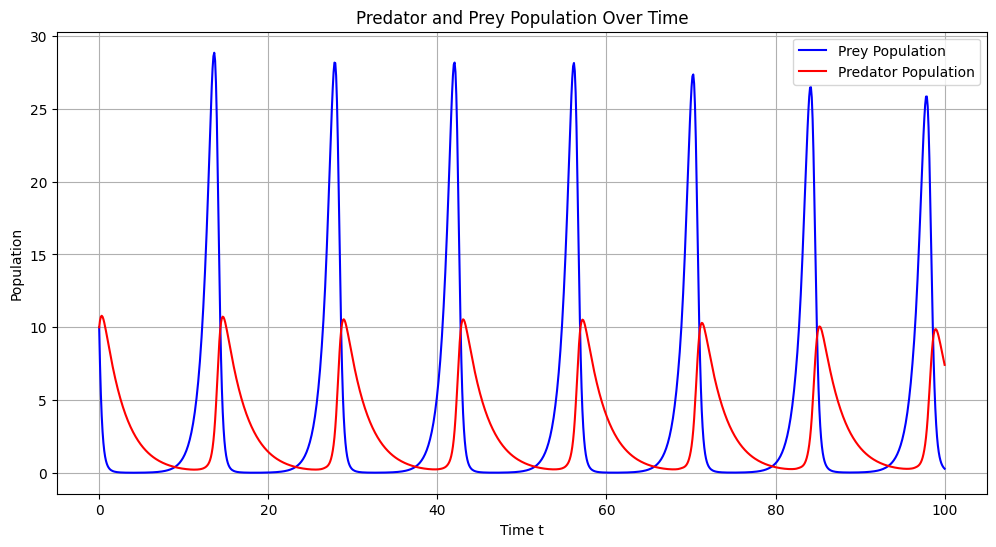

In [2]:
import numpy as np
from scipy.integrate import solve_ivp # for solving the ode
import matplotlib.pyplot as plt

# Define the Lotka-Volterra model u1 prey (rabbit), u2 predator (fox)
def lotka_volterra(t, u, theta1, theta2, theta12, theta21):
    u1, u2 = u
    du1dt = theta1 * u1 - theta12 * u1 * u2
    du2dt = theta21 * u1 * u2 - theta2 * u2
    return [du1dt, du2dt]

# Set parameters
theta1 = 1.1
theta2 = 0.4
theta12 = 0.4
theta21 = 0.1

u0 = np.array([10, 10]) # initial condition
T=100

# Solve the Lotka-Volterra equations for the fixed initial condition
t_span = [0, T]
t_eval = np.linspace(0, T, 1000)  # number of evaluation points
sol = solve_ivp(lotka_volterra, t_span, u0, t_eval=t_eval, args=(theta1, theta2, theta12, theta21))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t_eval, sol.y[0], label='Prey Population', color='blue')
plt.plot(t_eval, sol.y[1], label='Predator Population', color='red')
plt.title('Predator and Prey Population Over Time')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()